# PCA - A demonstration

Author: Umberto Michelucci (umberto.michelucci@toelt.ai)

In [55]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## The Breast Cancer Dataset

The Breast Cancer dataset, often used in machine learning and medical research, typically includes a variety of features derived from breast mass images. These images are usually obtained through fine needle aspirate (FNA) of breast masses. The features commonly found in this dataset include:

1. **ID Number:** Each instance in the dataset is assigned a unique identification number.
2. **Diagnosis:** This is the target variable, indicating whether the breast mass is malignant (M) or benign (B).
3. **Radius:** Average of distances from the center to points on the perimeter.
4. **Texture:** Standard deviation of gray-scale values.
5. **Perimeter:** Size of the core tumor.
6. **Area:** Area of the cancer mass.
7. **Smoothness:** Local variation in radius lengths.
8. **Compactness:** Perimeter^2 / Area - 1.0.
9. **Concavity:** Severity of concave portions of the contour.
10. **Concave Points:** Number of concave portions of the contour.
11. **Symmetry:** Symmetry of the mass.
12. **Fractal Dimension:** "Coastline approximation" - 1.

These features are typically computed for each cell nucleus present in the image. The dataset may present these features as mean values, worst (mean of the three largest values), and standard errors, leading to a large number of attributes for each instance.

The Breast Cancer dataset is often used in classification tasks where the goal is to predict whether a tumor is benign or malignant based on these features. This dataset is instrumental in helping researchers and practitioners develop and evaluate machine learning models for diagnostic purposes in oncology.

In [56]:
breast = load_breast_cancer()

In [57]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [58]:
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
labels.shape

(569, 1)

In [59]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [60]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [61]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [62]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Labels are not relevant in this example...

In [63]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [64]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


# Normalisation of the features

The `StandardScaler()` function in Python is part of the `sklearn.preprocessing` module in the Scikit-learn library, which is widely used in machine learning for data preprocessing. This function standardizes features by removing the mean and scaling to unit variance. Here's a breakdown of its key aspects:

1. **Purpose**: `StandardScaler()` is used to transform a dataset so that it has a mean of 0 and a standard deviation of 1 for each feature. This process is known as standardization and is often a necessary step in data preprocessing, especially for algorithms that are sensitive to the scale of input features, such as Support Vector Machines (SVMs), k-nearest neighbors (k-NN), and principal component analysis (PCA).

2. **How it Works**:
   - **Mean Removal**: Each feature's mean is subtracted from the dataset, leading to a new mean of 0.
   - **Scaling to Unit Variance**: Each feature is divided by its standard deviation, resulting in a standard deviation of 1.

3. **Usage**:
   - **Fitting**: The `fit` method computes the mean and standard deviation of each feature in the training set.
   - **Transforming**: The `transform` method applies the mean and standard deviation calculations to scale the data.
   - **Combined Fit and Transform**: The `fit_transform` method combines both steps on the training data for efficiency.

4. **Syntax**:
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   scaled_data = scaler.fit_transform(original_data)
   ```

5. **Importance in Machine Learning**: Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale. The `StandardScaler` ensures that the features are approximately on the same scale, which improves the performance and stability of these algorithms.

6. **Considerations**:
   - **Data Distribution**: StandardScaler assumes that the data is normally distributed at the feature level. If the data is not normally distributed, this might not be the best scaler to use.
   - **Sensitive to Outliers**: Since mean and standard deviation are influenced by outliers, `StandardScaler` can be sensitive to outlier values in the data.

Overall, `StandardScaler()` is a powerful and essential tool for data preprocessing in machine learning, especially for algorithms that are sensitive to the scale and distribution of the input features.

In [65]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

let us check if the normalisation has worked

In [66]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [67]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [68]:
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


## PCA Application

In [69]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [70]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [71]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [72]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

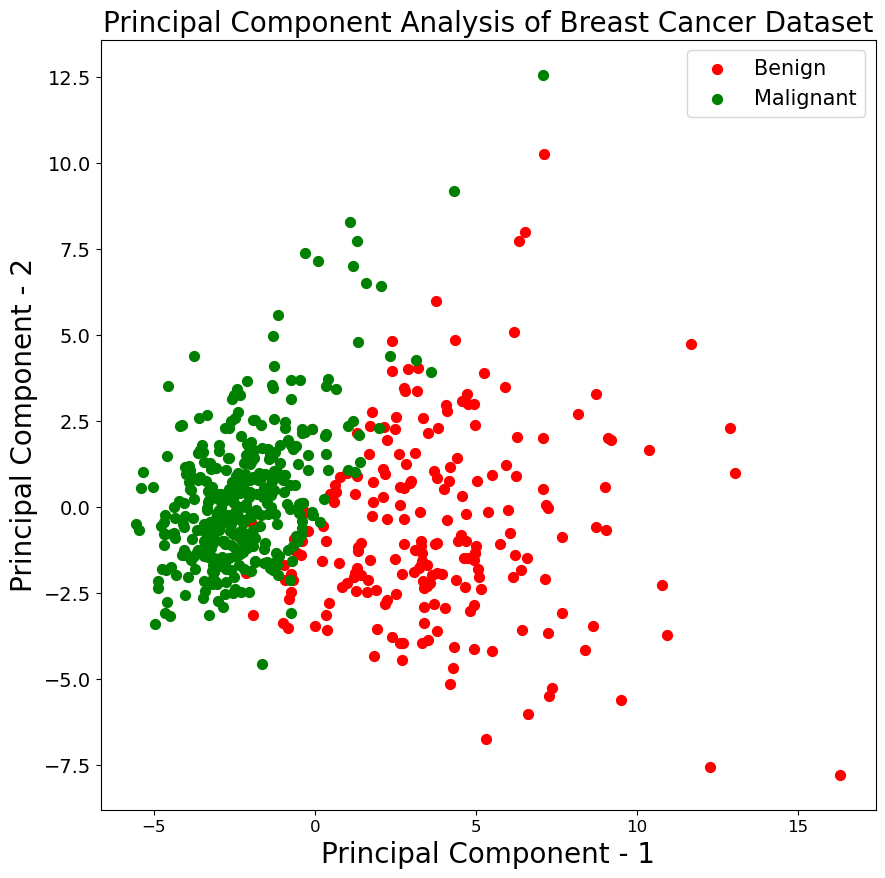

In [73]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## Loadings of the new basis 

In [74]:
loadings = pd.DataFrame(pca_breast.components_.T, columns=['PC1', 'PC2'], index=breast.feature_names)
loadings

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575
